**1.  Import and Install Dependencies**

In [50]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python mediapipe==0.8.5 scikit-learn matplotlib

     --------------------------------------- 53.7/53.7 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: mediapipe
    Found existing installation: mediapipe 0.9.0.1
    Uninstalling mediapipe-0.9.0.1:
      Successfully uninstalled mediapipe-0.9.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python39\\site-packages\\~ediapipe\\python\\opencv_world3410.dll'
Consider using the `--user` option or check the permissions.



In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

**2. Keypoints using MP Holistic**

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities


In [4]:
def mediapipe_detection(image, model):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
  image.flags.writeable = False                   # Image is no longer writeable
  results = model.process(image)                  # Make prediction
  image.flags.writeable = True                    # Image is now writeable
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
  return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw-left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw right hand connections

In [6]:
def draw_styled_landmarks (image, results):
    #Draw face connections
    mp_drawing.draw_landmarks(image, results. face_landmarks, mp_holistic.FACE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(88,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec (color=(80, 44, 121), thickness=2, circle_radius=2)
                             )
    #Draw Left hand connections
    mp_drawing.draw_landmarks (image, results. left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec (color=(121,44,250), thickness=2, circle_radius=2) 
                              )
    #Draw right hand connections
    mp_drawing.draw_landmarks (image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )

In [6]:
cap = cv2.VideoCapture(0)
# Set mediopipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():

    #Read feed
    ret, frame = cap.read()

    #Make detections
    image, results = mediapipe_detection(frame, holistic)
    print(results)
    
    #Draw landmarks
    draw_styled_landmarks (image, results)

    #Show to screen
    cv2.imshow("OpenCV Feed", frame)

    #Break gracefully
    if cv2.waitKey(10) & 0xFF== ord('q'):
        break

  cap.release()
  cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

In [5]:
len(results.face_landmarks.landmark)

NameError: name 'results' is not defined

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [7]:
draw_landmarks(frame, results)

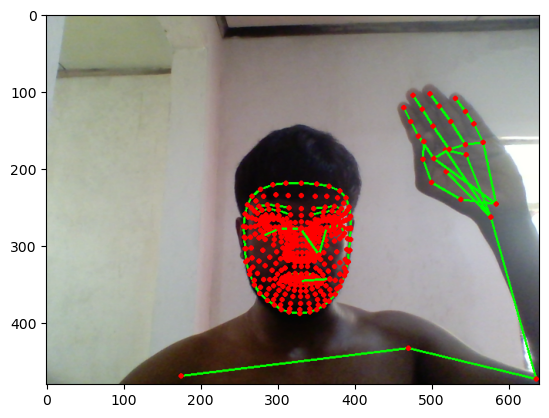

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

**3.  Exract Keypoint Values**

In [12]:
results.pose_landmarks

landmark {
  x: 0.5596650838851929
  y: 0.6306362152099609
  z: -0.9112688899040222
  visibility: 0.9998080134391785
}
landmark {
  x: 0.5779265761375427
  y: 0.5524956583976746
  z: -0.8279980421066284
  visibility: 0.999770998954773
}
landmark {
  x: 0.5921043157577515
  y: 0.5510452389717102
  z: -0.8284794092178345
  visibility: 0.9997810125350952
}
landmark {
  x: 0.6050747036933899
  y: 0.5490675568580627
  z: -0.8290723562240601
  visibility: 0.9997814893722534
}
landmark {
  x: 0.5313910841941833
  y: 0.5527199506759644
  z: -0.8536114692687988
  visibility: 0.9996947050094604
}
landmark {
  x: 0.5119529962539673
  y: 0.5515794157981873
  z: -0.8531818389892578
  visibility: 0.9996585249900818
}
landmark {
  x: 0.4912332594394684
  y: 0.5500115156173706
  z: -0.852812647819519
  visibility: 0.9996122121810913
}
landmark {
  x: 0.6079522371292114
  y: 0.570128858089447
  z: -0.3063879907131195
  visibility: 0.9997449517250061
}
landmark {
  x: 0.44913092255592346
  y: 0.56737059

In [6]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [8]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(21*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [9]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

NameError: name 'results' is not defined

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(21*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
extract_keypoints(results)

AttributeError: 'NoneType' object has no attribute 'landmark'

**4.  Setup Folders for Collection**

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join("MP_Data")

#Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#Thirty videos worth of data
no_sequences = 30

#Videos are going to be 30 frames in Length
sequence_length = 30

In [21]:
#hello
## 0
## 1
## 2
## 29
#thanks

# I Love you

In [12]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

**5.  Collect Keypoint Values for Training and Testing**

In [20]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
            for sequence in range(no_sequences):
                # Loop through video Length aka sequence Length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()

                    # Make detections
                    image, results = mediapipe_detection (frame, holistic)
                    # print(results)
                        
                    #Drow Landmarks
                    draw_styled_landmarks (image, results)

                    # NEW Apply wait logic

                    if frame_num == 0:
                        cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV_Feed', image)
                        cv2.waitKey(2000)
                    else:
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('Opencv_Feed', image)
                        
                        #NEW Export keypoints
                        keypoints = extract_keypoints(results)
                        npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                        np.save(npy_path, keypoints)

                        #Break gracefully
                        if cv2.waitKey(10) & 0xFF == ord('q'):
                            break
    cap.release()
    cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'landmark'

**6.  Preprocess Data and Create Lables and Features**

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [11]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [12]:
np.array(sequences).shape

(90, 30, 321)

In [32]:
np.array(labels).shape

(90,)

In [27]:
x = np.array(sequences)

In [28]:
x.shape

(90, 30, 321)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.05)

In [32]:
y_test.shape

(5, 3)

**7.  Build and TRain LSTM Neural Network**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [15]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,321)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [60]:
x.shape

(90, 30, 321)

In [47]:
res = [.7,0.2,0.1]

In [48]:
actions[np.argmax(res)]

'hello'

In [16]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [50]:
model.fit(x_train, y_train, epochs=2000, callbacks =[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 64ms/step - loss: 1.0412 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8526 - categorical_accuracy: 0.5647
Epoch 3/2000
3/3 [==============================] - 0s 48ms/step - loss: 0.6694 - categorical_accuracy: 0.6588
Epoch 4/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.5987 - categorical_accuracy: 0.6824
Epoch 5/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.5937 - categorical_accuracy: 0.6235
Epoch 6/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.8686 - categorical_accuracy: 0.6706
Epoch 7/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.5942 - categorical_accuracy: 0.6706
Epoch 8/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.6031 - categorical_accuracy: 0.6706
Epoch 9/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.5635 - categorical_accuracy: 0.6706
E

3/3 [==============================] - 0s 67ms/step - loss: 0.4421 - categorical_accuracy: 0.6471
Epoch 75/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4417 - categorical_accuracy: 0.6824
Epoch 76/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4434 - categorical_accuracy: 0.6824
Epoch 77/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.4425 - categorical_accuracy: 0.6824
Epoch 78/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4405 - categorical_accuracy: 0.7176
Epoch 79/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4418 - categorical_accuracy: 0.6824
Epoch 80/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4449 - categorical_accuracy: 0.6824
Epoch 81/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4429 - categorical_accuracy: 0.6824
Epoch 82/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.4444 - categorical_accuracy: 0.6471
Epoch 

3/3 [==============================] - 0s 59ms/step - loss: 0.4420 - categorical_accuracy: 0.6235
Epoch 147/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4418 - categorical_accuracy: 0.6824
Epoch 148/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.4427 - categorical_accuracy: 0.6824
Epoch 149/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.4406 - categorical_accuracy: 0.7059
Epoch 150/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.4413 - categorical_accuracy: 0.6824
Epoch 151/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4427 - categorical_accuracy: 0.6824
Epoch 152/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4419 - categorical_accuracy: 0.6824
Epoch 153/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 154/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4415 - categorical_accuracy: 0.682

3/3 [==============================] - 0s 58ms/step - loss: 0.4421 - categorical_accuracy: 0.6824
Epoch 219/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.4425 - categorical_accuracy: 0.6824
Epoch 220/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4413 - categorical_accuracy: 0.6471
Epoch 221/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4418 - categorical_accuracy: 0.6000
Epoch 222/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4403 - categorical_accuracy: 0.6824
Epoch 223/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 224/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4417 - categorical_accuracy: 0.6824
Epoch 225/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4430 - categorical_accuracy: 0.6706
Epoch 226/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4421 - categorical_accuracy: 0.611

3/3 [==============================] - 0s 90ms/step - loss: 0.4431 - categorical_accuracy: 0.6824
Epoch 291/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4804 - categorical_accuracy: 0.6588
Epoch 292/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4688 - categorical_accuracy: 0.6706
Epoch 293/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.4859 - categorical_accuracy: 0.6824
Epoch 294/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4557 - categorical_accuracy: 0.6824
Epoch 295/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4596 - categorical_accuracy: 0.6706
Epoch 296/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4611 - categorical_accuracy: 0.6706
Epoch 297/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4545 - categorical_accuracy: 0.6353
Epoch 298/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4486 - categorical_accuracy: 0.682

3/3 [==============================] - 0s 90ms/step - loss: 0.4450 - categorical_accuracy: 0.6824
Epoch 363/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.4443 - categorical_accuracy: 0.6824
Epoch 364/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4413 - categorical_accuracy: 0.6824
Epoch 365/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4458 - categorical_accuracy: 0.6824
Epoch 366/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.4439 - categorical_accuracy: 0.6824
Epoch 367/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 368/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4432 - categorical_accuracy: 0.5765
Epoch 369/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4454 - categorical_accuracy: 0.6824
Epoch 370/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.4442 - categorical_accuracy: 0.682

3/3 [==============================] - 0s 68ms/step - loss: 0.4421 - categorical_accuracy: 0.6824
Epoch 435/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4411 - categorical_accuracy: 0.6588
Epoch 436/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4417 - categorical_accuracy: 0.6824
Epoch 437/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4414 - categorical_accuracy: 0.6824
Epoch 438/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4409 - categorical_accuracy: 0.6824
Epoch 439/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4405 - categorical_accuracy: 0.6824
Epoch 440/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4420 - categorical_accuracy: 0.6824
Epoch 441/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4411 - categorical_accuracy: 0.6824
Epoch 442/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4420 - categorical_accuracy: 0.682

3/3 [==============================] - 0s 93ms/step - loss: 0.4421 - categorical_accuracy: 0.6824
Epoch 507/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.4405 - categorical_accuracy: 0.6824
Epoch 508/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.4437 - categorical_accuracy: 0.6824
Epoch 509/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 510/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4410 - categorical_accuracy: 0.6706
Epoch 511/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 512/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4413 - categorical_accuracy: 0.6824
Epoch 513/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4464 - categorical_accuracy: 0.6824
Epoch 514/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4430 - categorical_accuracy: 0.682

3/3 [==============================] - 0s 70ms/step - loss: 0.4406 - categorical_accuracy: 0.6941
Epoch 579/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4416 - categorical_accuracy: 0.6824
Epoch 580/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.4415 - categorical_accuracy: 0.6824
Epoch 581/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4417 - categorical_accuracy: 0.6824
Epoch 582/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.4408 - categorical_accuracy: 0.7059
Epoch 583/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.4418 - categorical_accuracy: 0.6824
Epoch 584/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.4428 - categorical_accuracy: 0.6824
Epoch 585/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4420 - categorical_accuracy: 0.6824
Epoch 586/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4407 - categorical_accuracy: 0.68

3/3 [==============================] - 0s 67ms/step - loss: 0.4424 - categorical_accuracy: 0.6824
Epoch 651/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4457 - categorical_accuracy: 0.6824
Epoch 652/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.4429 - categorical_accuracy: 0.6824
Epoch 653/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4410 - categorical_accuracy: 0.6824
Epoch 654/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4419 - categorical_accuracy: 0.6824
Epoch 655/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4431 - categorical_accuracy: 0.6824
Epoch 656/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.4459 - categorical_accuracy: 0.6824
Epoch 657/2000
3/3 [==============================] - 2s 720ms/step - loss: 0.4469 - categorical_accuracy: 0.6824
Epoch 658/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4430 - categorical_accuracy: 0.68

3/3 [==============================] - 0s 65ms/step - loss: 0.4421 - categorical_accuracy: 0.6824
Epoch 723/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4413 - categorical_accuracy: 0.6824
Epoch 724/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 725/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 726/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4419 - categorical_accuracy: 0.6824
Epoch 727/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4407 - categorical_accuracy: 0.6824
Epoch 728/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4410 - categorical_accuracy: 0.6824
Epoch 729/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4414 - categorical_accuracy: 0.6824
Epoch 730/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4419 - categorical_accuracy: 0.63

3/3 [==============================] - 0s 70ms/step - loss: 0.4406 - categorical_accuracy: 0.6941
Epoch 795/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4408 - categorical_accuracy: 0.6235
Epoch 796/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4460 - categorical_accuracy: 0.6824
Epoch 797/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4435 - categorical_accuracy: 0.6706
Epoch 798/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 799/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4418 - categorical_accuracy: 0.6824
Epoch 800/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4411 - categorical_accuracy: 0.6471
Epoch 801/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4411 - categorical_accuracy: 0.6471
Epoch 802/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4408 - categorical_accuracy: 0.682

3/3 [==============================] - 0s 67ms/step - loss: 0.4412 - categorical_accuracy: 0.6588
Epoch 867/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 868/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4419 - categorical_accuracy: 0.6824
Epoch 869/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4415 - categorical_accuracy: 0.6824
Epoch 870/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4420 - categorical_accuracy: 0.6824
Epoch 871/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4408 - categorical_accuracy: 0.6706
Epoch 872/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4409 - categorical_accuracy: 0.6824
Epoch 873/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4411 - categorical_accuracy: 0.6824
Epoch 874/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4408 - categorical_accuracy: 0.670

3/3 [==============================] - 0s 70ms/step - loss: 0.4410 - categorical_accuracy: 0.6471
Epoch 939/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4407 - categorical_accuracy: 0.6824
Epoch 940/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.4411 - categorical_accuracy: 0.6353
Epoch 941/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.4406 - categorical_accuracy: 0.6706
Epoch 942/2000
3/3 [==============================] - 1s 683ms/step - loss: 0.4432 - categorical_accuracy: 0.5647
Epoch 943/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4414 - categorical_accuracy: 0.6824
Epoch 944/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4407 - categorical_accuracy: 0.6824
Epoch 945/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 946/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.4411 - categorical_accuracy: 0.68

3/3 [==============================] - 0s 96ms/step - loss: 0.4488 - categorical_accuracy: 0.5294
Epoch 1011/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.4435 - categorical_accuracy: 0.6824
Epoch 1012/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4407 - categorical_accuracy: 0.6824
Epoch 1013/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4407 - categorical_accuracy: 0.6824
Epoch 1014/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.4413 - categorical_accuracy: 0.6824
Epoch 1015/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4414 - categorical_accuracy: 0.6353
Epoch 1016/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4410 - categorical_accuracy: 0.6353
Epoch 1017/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.4416 - categorical_accuracy: 0.6824
Epoch 1018/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.4421 - categorical_accurac

3/3 [==============================] - 0s 80ms/step - loss: 0.4407 - categorical_accuracy: 0.6471
Epoch 1083/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4414 - categorical_accuracy: 0.6824
Epoch 1084/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4412 - categorical_accuracy: 0.6824
Epoch 1085/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4405 - categorical_accuracy: 0.6824
Epoch 1086/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4410 - categorical_accuracy: 0.6824
Epoch 1087/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4404 - categorical_accuracy: 0.6824
Epoch 1088/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4408 - categorical_accuracy: 0.6941
Epoch 1089/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4418 - categorical_accuracy: 0.6824
Epoch 1090/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4418 - categorical_accurac

Epoch 1154/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4411 - categorical_accuracy: 0.6706
Epoch 1155/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4411 - categorical_accuracy: 0.6824
Epoch 1156/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4408 - categorical_accuracy: 0.6824
Epoch 1157/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.4408 - categorical_accuracy: 0.6706
Epoch 1158/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4405 - categorical_accuracy: 0.6706
Epoch 1159/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4410 - categorical_accuracy: 0.6824
Epoch 1160/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4415 - categorical_accuracy: 0.6235
Epoch 1161/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.4414 - categorical_accuracy: 0.6235
Epoch 1162/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.4407 - cat

3/3 [==============================] - 0s 75ms/step - loss: 231.5562 - categorical_accuracy: 0.4588
Epoch 1226/2000
3/3 [==============================] - 0s 78ms/step - loss: 608.9368 - categorical_accuracy: 0.3529
Epoch 1227/2000
3/3 [==============================] - 0s 80ms/step - loss: 324.9594 - categorical_accuracy: 0.3294
Epoch 1228/2000
3/3 [==============================] - 0s 73ms/step - loss: 538.8611 - categorical_accuracy: 0.3647
Epoch 1229/2000
3/3 [==============================] - 0s 78ms/step - loss: 298.8978 - categorical_accuracy: 0.3176
Epoch 1230/2000
3/3 [==============================] - 0s 78ms/step - loss: 209.4071 - categorical_accuracy: 0.3294
Epoch 1231/2000
3/3 [==============================] - 0s 66ms/step - loss: 133.1600 - categorical_accuracy: 0.3176
Epoch 1232/2000
3/3 [==============================] - 0s 74ms/step - loss: 25.4496 - categorical_accuracy: 0.3294
Epoch 1233/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.0053 - cate

3/3 [==============================] - 0s 87ms/step - loss: 1.1130 - categorical_accuracy: 0.4235
Epoch 1297/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.1550 - categorical_accuracy: 0.4000
Epoch 1298/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.1074 - categorical_accuracy: 0.2824
Epoch 1299/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.1097 - categorical_accuracy: 0.3294
Epoch 1300/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.1131 - categorical_accuracy: 0.5294
Epoch 1301/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.0835 - categorical_accuracy: 0.2941
Epoch 1302/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0749 - categorical_accuracy: 0.3412
Epoch 1303/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0539 - categorical_accuracy: 0.4588
Epoch 1304/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.0808 - categorical_accura

3/3 [==============================] - 0s 104ms/step - loss: 0.9949 - categorical_accuracy: 0.6588
Epoch 1368/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0139 - categorical_accuracy: 0.3176
Epoch 1369/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0097 - categorical_accuracy: 0.3294
Epoch 1370/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0359 - categorical_accuracy: 0.4588
Epoch 1371/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0029 - categorical_accuracy: 0.4471
Epoch 1372/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.7238 - categorical_accuracy: 0.3529
Epoch 1373/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0681 - categorical_accuracy: 0.6000
Epoch 1374/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0731 - categorical_accuracy: 0.3176
Epoch 1375/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.0239 - categorical_accu

Epoch 1439/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.9999 - categorical_accuracy: 0.6706
Epoch 1440/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.9889 - categorical_accuracy: 0.6706
Epoch 1441/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9965 - categorical_accuracy: 0.4235
Epoch 1442/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.9924 - categorical_accuracy: 0.6118
Epoch 1443/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9959 - categorical_accuracy: 0.6706
Epoch 1444/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.9885 - categorical_accuracy: 0.6706
Epoch 1445/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.9902 - categorical_accuracy: 0.6235
Epoch 1446/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.9868 - categorical_accuracy: 0.6235
Epoch 1447/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9972 - ca

3/3 [==============================] - 0s 79ms/step - loss: 0.9581 - categorical_accuracy: 0.6588
Epoch 1511/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.9570 - categorical_accuracy: 0.6706
Epoch 1512/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.9567 - categorical_accuracy: 0.6706
Epoch 1513/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.9535 - categorical_accuracy: 0.6706
Epoch 1514/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9547 - categorical_accuracy: 0.6706
Epoch 1515/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.9572 - categorical_accuracy: 0.6706
Epoch 1516/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9549 - categorical_accuracy: 0.6471
Epoch 1517/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.9524 - categorical_accuracy: 0.6706
Epoch 1518/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.9535 - categorical_accurac

Epoch 1582/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.9217 - categorical_accuracy: 0.6353
Epoch 1583/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.9273 - categorical_accuracy: 0.6353
Epoch 1584/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.9215 - categorical_accuracy: 0.6706
Epoch 1585/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.9242 - categorical_accuracy: 0.6706
Epoch 1586/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.9207 - categorical_accuracy: 0.6824
Epoch 1587/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9206 - categorical_accuracy: 0.6706
Epoch 1588/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.9236 - categorical_accuracy: 0.6706
Epoch 1589/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.9201 - categorical_accuracy: 0.6471
Epoch 1590/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.9218 - cat

3/3 [==============================] - 0s 77ms/step - loss: 0.8921 - categorical_accuracy: 0.6588
Epoch 1654/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.8897 - categorical_accuracy: 0.6471
Epoch 1655/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8894 - categorical_accuracy: 0.6706
Epoch 1656/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.8897 - categorical_accuracy: 0.6706
Epoch 1657/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.8891 - categorical_accuracy: 0.6706
Epoch 1658/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.8908 - categorical_accuracy: 0.6706
Epoch 1659/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.8892 - categorical_accuracy: 0.6706
Epoch 1660/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.8885 - categorical_accuracy: 0.6588
Epoch 1661/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.8891 - categorical_accur

3/3 [==============================] - 0s 130ms/step - loss: 0.8689 - categorical_accuracy: 0.6706
Epoch 1725/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.8682 - categorical_accuracy: 0.6000
Epoch 1726/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.8621 - categorical_accuracy: 0.6706
Epoch 1727/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.8569 - categorical_accuracy: 0.6706
Epoch 1728/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.8561 - categorical_accuracy: 0.6824
Epoch 1729/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.8632 - categorical_accuracy: 0.6706
Epoch 1730/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.8605 - categorical_accuracy: 0.6824
Epoch 1731/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.8527 - categorical_accuracy: 0.6706
Epoch 1732/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.8523 - categorical

3/3 [==============================] - 0s 88ms/step - loss: 0.8475 - categorical_accuracy: 0.6706
Epoch 1796/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.8492 - categorical_accuracy: 0.6706
Epoch 1797/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.8568 - categorical_accuracy: 0.5765
Epoch 1798/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8410 - categorical_accuracy: 0.6824
Epoch 1799/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8587 - categorical_accuracy: 0.6471
Epoch 1800/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.8552 - categorical_accuracy: 0.7529
Epoch 1801/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8576 - categorical_accuracy: 0.6706
Epoch 1802/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.8474 - categorical_accuracy: 0.6706
Epoch 1803/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8420 - categorical_accurac

Epoch 1867/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.8211 - categorical_accuracy: 0.6706
Epoch 1868/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.8134 - categorical_accuracy: 0.6706
Epoch 1869/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.8175 - categorical_accuracy: 0.6706
Epoch 1870/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.8158 - categorical_accuracy: 0.6706
Epoch 1871/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.8147 - categorical_accuracy: 0.6706
Epoch 1872/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.8383 - categorical_accuracy: 0.6824
Epoch 1873/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.8424 - categorical_accuracy: 0.6000
Epoch 1874/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.8307 - categorical_accuracy: 0.5882
Epoch 1875/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8365 - ca

3/3 [==============================] - 0s 71ms/step - loss: 0.7891 - categorical_accuracy: 0.6706
Epoch 1939/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.7904 - categorical_accuracy: 0.6235
Epoch 1940/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.7928 - categorical_accuracy: 0.6588
Epoch 1941/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.7834 - categorical_accuracy: 0.6353
Epoch 1942/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.7879 - categorical_accuracy: 0.7059
Epoch 1943/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.7816 - categorical_accuracy: 0.6706
Epoch 1944/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.7819 - categorical_accuracy: 0.6706
Epoch 1945/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.7796 - categorical_accuracy: 0.6706
Epoch 1946/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.7810 - categorical_ac

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            98816     
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 253,379
Trainable params: 253,379
Non-tr

**8.  Make Predictions**

In [72]:
re = model.predict(x_test)

In [79]:
actions[np.argmax(res[0])]

'hello'

In [80]:
actions[np.argmax(y_test[0])]

'thanks'

**9.  Save Weights**

In [69]:
model.save('action.h5')

In [70]:
model.load_weights('action.h5')

**10.  Evaluation using Confusion Matrix and Accuracy**

In [81]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [82]:
yhat = model.predict(x_train)

In [83]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [84]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 0, 55],
        [ 0, 30]],

       [[58,  0],
        [27,  0]],

       [[57,  0],
        [28,  0]]], dtype=int64)

In [86]:
accuracy_score(ytrue, yhat)

0.35294117647058826

**11.  Test in Real Time**

In [80]:
colors = [(245,117,16), (117,245, 16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

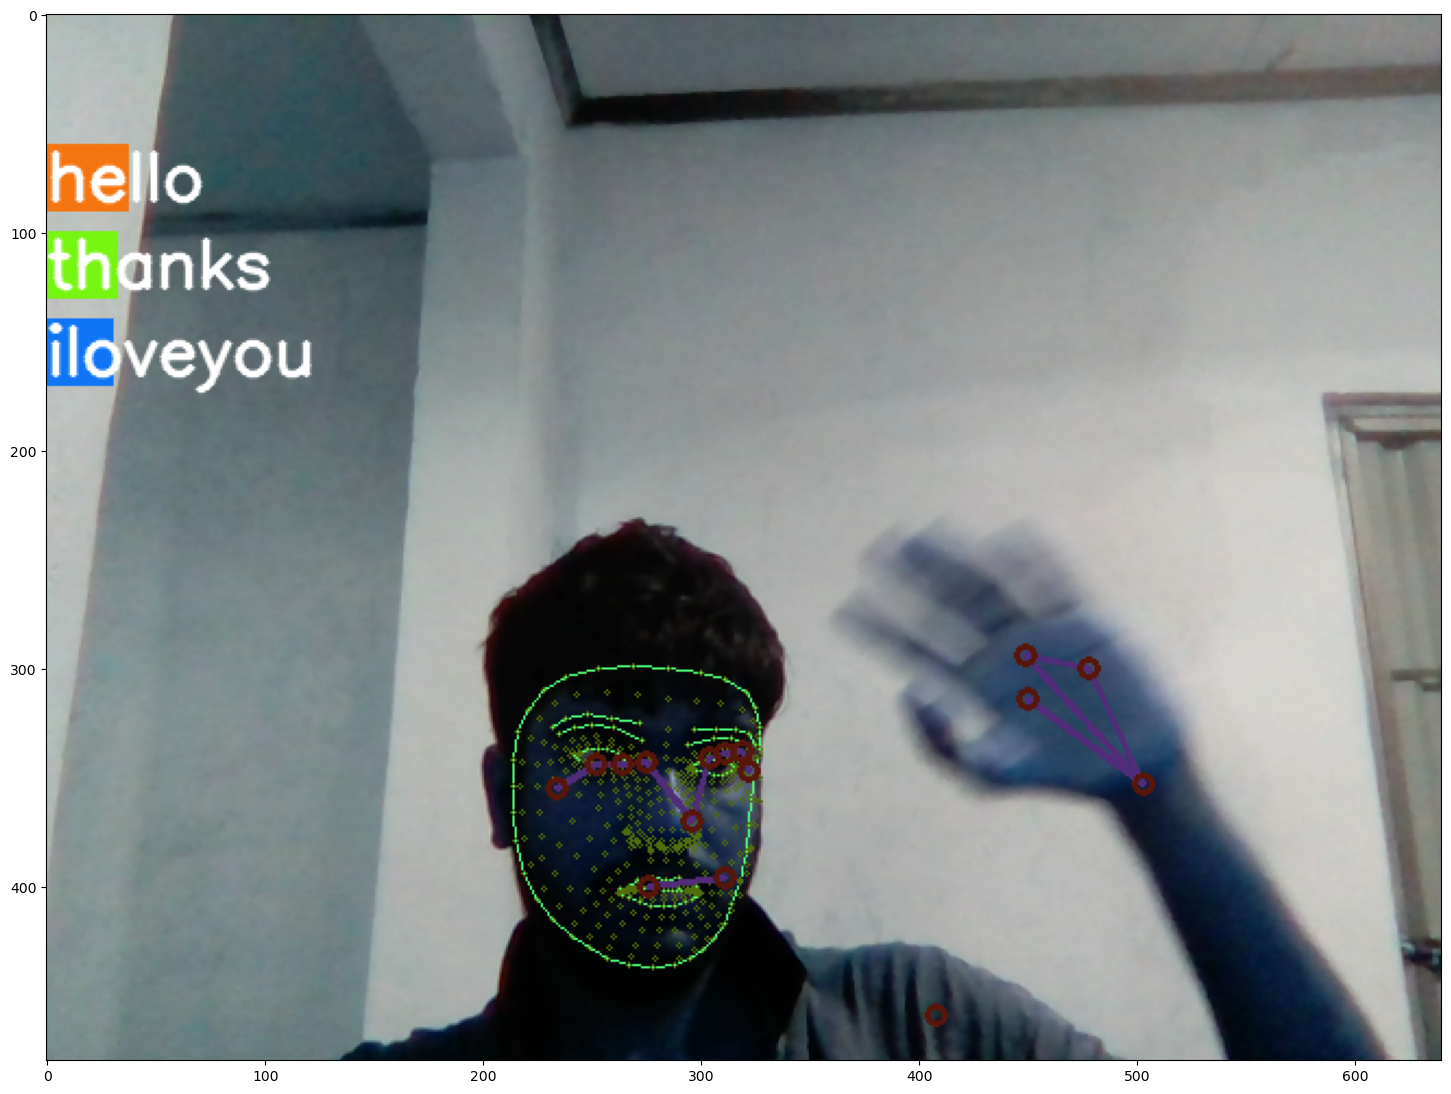

In [81]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [84]:
# 1. New detection variables
sentence = []
sequence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediopipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        #Draw Landmarks
        draw_styled_landmarks(image, results)

        #2. Prediction Logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions [np.argmax(res)])
            predictions.append(np.argmax(res))

        #3. Viz Logic
            if np.unique(predictions[-10:])[0]== np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) > 5:
                sentence = sentence[-5:]
            # viz probabilities
            image = prob_viz(res, action, image, colors)
        
#         output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions [num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image,''.join(sentence), (3,30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllwindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

AttributeError: 'NoneType' object has no attribute 'landmark'